In [2]:
from google.colab import drive
drive.mount("Drive")

Mounted at Drive


## **Dependencies**

In [3]:
from PIL import Image
from PIL import features
import matplotlib.pyplot as plt
import numpy as np
import os

## **Implementation of Techniques**

### **Checking Image Formats**

In [ ]:
features.pilinfo()

--------------------------------------------------------------------
Pillow 7.1.2
Python 3.8.16 (default, Dec  7 2022, 01:12:13)
       [GCC 7.5.0]
--------------------------------------------------------------------
Python modules loaded from /usr/local/lib/python3.8/dist-packages/PIL
Binary modules loaded from /usr/local/lib/python3.8/dist-packages/PIL
--------------------------------------------------------------------
--- PIL CORE support ok
--- TKINTER support ok
--- FREETYPE2 support ok
--- LITTLECMS2 support ok
--- WEBP support ok
--- WEBP Transparency support ok
--- WEBPMUX support ok
--- WEBP Animation support ok
--- JPEG support ok
--- OPENJPEG (JPEG2000) support ok
--- ZLIB (PNG/ZIP) support ok
--- LIBTIFF support ok
*** RAQM (Bidirectional Text) support not installed
*** LIBIMAGEQUANT (Quantization method) support not installed
*** XCB (X protocol) support not installed
--------------------------------------------------------------------
BLP
Extensions: .blp
Features: open


### **Loading and Displaying an Image**

In [4]:
os.chdir("/content/Drive/MyDrive/@DIP/Images")
os.getcwd()
os.listdir()

['DancingInWater.jpg',
 'testpat.1k.color.tif',
 'Shapes.png',
 'fruits.jpg',
 'lenna.png',
 'witch.png']

In [5]:
image = Image.open("fruits.jpg")

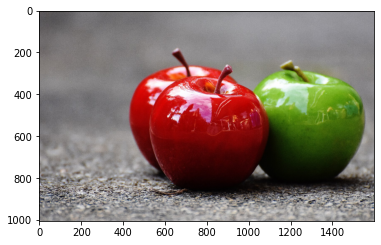

In [6]:
plt.imshow(image)

### **Accessing a Pixel**

In [ ]:
image_arr = np.array(image)

In [ ]:
# First pixel
print(image_arr[0][0])

[103  99 100]


In [ ]:
# Pixel located in the fifth row and tenth column
print(image_arr[5][10])

[103  99 100]


In [ ]:
# Pixel located in the hundredth row and fourteenth column
print(image_arr[100][14])

[100  96  97]


### **Displaying Color Channels Individually**

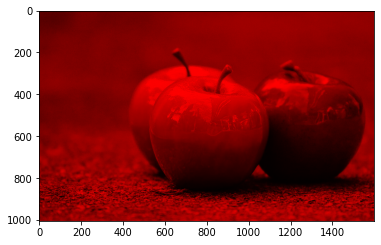

In [ ]:
# Displaying the RED color channel
image_r = np.array(image)

image_r[:,:,1] = 0
image_r[:,:,2] = 0

plt.imshow(image_r)

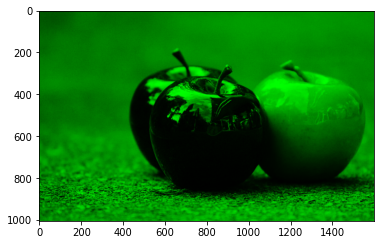

In [ ]:
# Displaying the GREEN color channel
image_r = np.array(image)

image_r[:,:,0] = 0
image_r[:,:,2] = 0

plt.imshow(image_r)

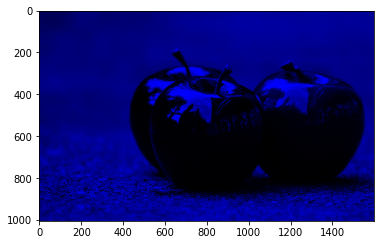

In [ ]:
# Displaying the BLUE color channel
image_r = np.array(image)

image_r[:,:,0] = 0
image_r[:,:,1] = 0

plt.imshow(image_r)

### **Conversion from RGB to YIQ and from YIQ to RGB**

In [7]:
rgb_image = np.array(image)

In [8]:
def rgb_limiter(value):
  if value > 255:
    return 255
  elif value < 0:
    return 0
  
  return value

In [15]:
def fromRGB_to_YIQ(rgb_image):
  rows, columns, components = rgb_image.shape
  
  # The matrix created will be used to avoid changing the original matrix.
  yiq_image = np.zeros((rows, columns, components), dtype=float)

  for i in range(rows):
    for j in range(columns):
      yiq_image[i][j][0] = 0.299 * rgb_image[i][j][0] + 0.587 * rgb_image[i][j][1] + 0.114 * rgb_image[i][j][2]
      yiq_image[i][j][1] = 0.596 * rgb_image[i][j][0] - 0.274 * rgb_image[i][j][1] - 0.322 * rgb_image[i][j][2]
      yiq_image[i][j][2] = 0.211 * rgb_image[i][j][0] - 0.523 * rgb_image[i][j][1] + 0.312 * rgb_image[i][j][2]
  
  return yiq_image

In [16]:
def fromYIQ_to_RGB(yiq_image):
  rows, columns, components = yiq_image.shape
  
  #The matrix created will be used to avoid changing the original matrix.
  rgb_image_result = np.zeros((rows, columns, components), dtype=int)

  for i in range(rows):
    for j in range(columns):
      rgb_image_result[i][j][0] = rgb_limiter(yiq_image[i][j][0] + 0.956 * yiq_image[i][j][1] + 0.114 * yiq_image[i][j][2])
      rgb_image_result[i][j][1] = rgb_limiter(yiq_image[i][j][0] - 0.272 * yiq_image[i][j][1] - 0.647 * yiq_image[i][j][2])
      rgb_image_result[i][j][2] = rgb_limiter(yiq_image[i][j][0] - 1.106 * yiq_image[i][j][1] + 1.703 * yiq_image[i][j][2])
  
  return rgb_image_result

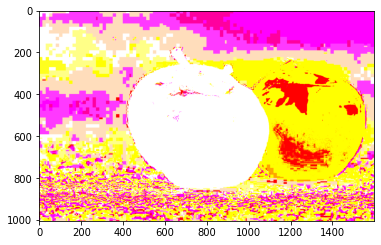

In [17]:
# Trying to display an image after it has been converted to YIQ color space
yiq_image = fromRGB_to_YIQ(rgb_image)
plt.imshow(yiq_image)

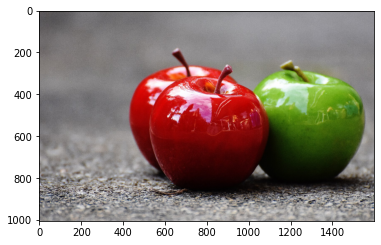

In [18]:
# Display an RGB image after converting it to YIQ color space and returning it to RGB
rgb_image_result = fromYIQ_to_RGB(yiq_image)
plt.imshow(rgb_image)